In [9]:
import os
os.chdir("G:\My Drive\Paper MachineLearning FB\Paper MachineLearning FB")

mypath = r"Data/Senamhi/"

from os import listdir
from os.path import isfile, join

files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Eliminamos la ultima
files = files[0:30]

# Creamos los dataframes
import pandas as pd
import numpy as np


# Este loop lee los .txt y crea los dataframe
for f in files:
    locals()[f[0:10]] = pd.read_csv(str(mypath+f), sep="\s", engine="python", 
                                    names=["year", "month", "day", "cumprecipitation", "maxtemp", "mintemp"],
                                    parse_dates=[[0,1,2]], index_col=0)
    locals()[f[0:10]] = locals()[f[0:10]].replace([-99.9], [np.nan])
    #locals()[f[0:10]] = pd.concat([locals()[f[0:10]],
    #pd.Series(pd.to_datetime(locals()[f[0:10]][['year', 'month', 'day']], unit="D"), name="Date")], axis=1)
    #locals()[f[0:10]] = locals()[f[0:10]].set_index("Date")
    

def plot_average(serie, error, smooth):
    plt.figure(figsize=(15, 7))
    plt.plot(serie.index,serie.rolling(smooth).sum(), color='r')
    plt.fill_between(serie.index, serie.rolling(smooth).sum()-error,
                     serie.rolling(smooth).sum()+error, alpha=0.5, linestyle='dashed',
                     edgecolor='k', linewidth=2, antialiased=True)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
    plt.ylabel('Minimum temperature °C', fontsize=20)
    exec(f'plt.title("Average minimum temperature in Puno {year}", fontsize=25)')
    exec(f'plt.savefig("MinTemp_{year}.png", dpi=600)')

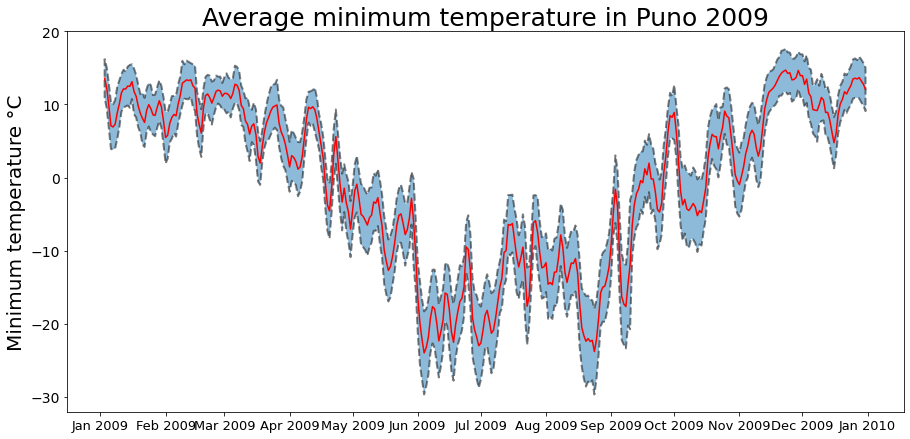

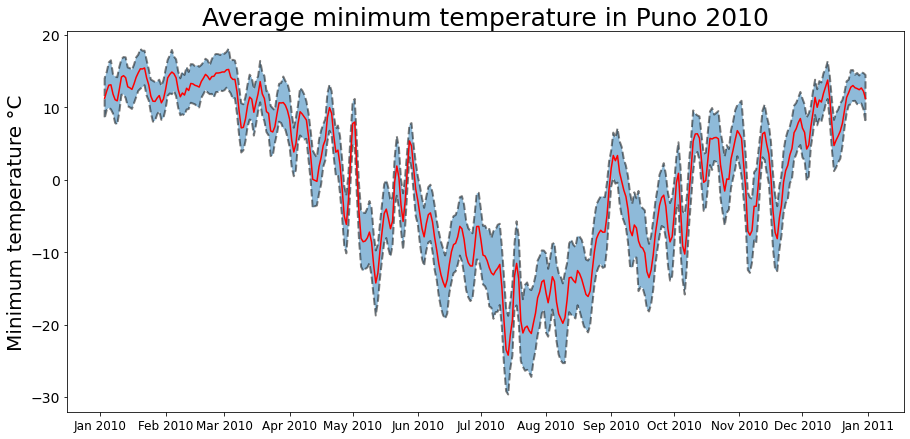

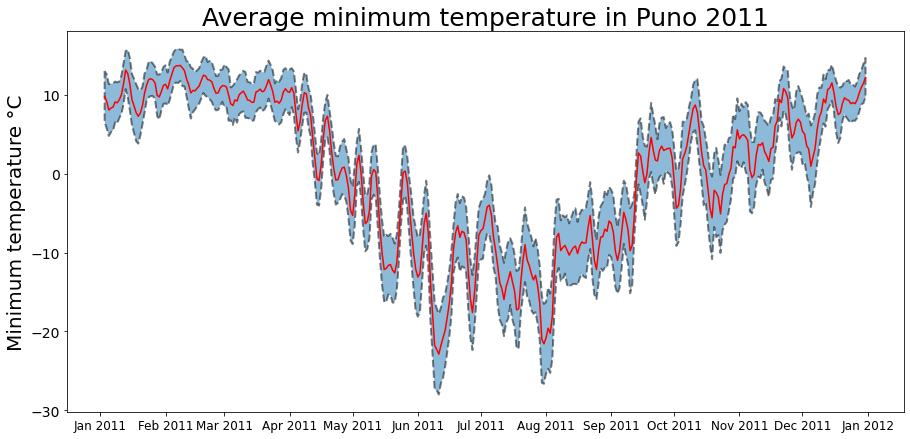

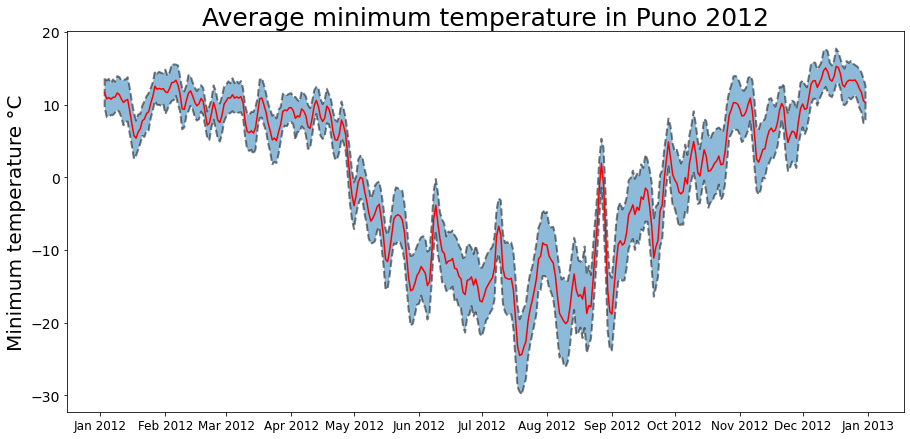

In [10]:
# Este loop junta todo de un año en un solo dataframe, para poder hacer calculos
for y in np.arange(2009,2013,1):

    year = y
    f = "qc00000822.txt"
    locals()[f'master_{year}'] = pd.Series(locals()[f[0:10]].mintemp.loc[str(year)], name=f[0:10])
    for f in files[1:30]:
        locals()[f'master_{year}'] = pd.concat([locals()[f'master_{year}'], 
                                                pd.Series(locals()[f[0:10]].mintemp.loc[str(year)], name=f[0:10])], axis=1)
        
    exec(f'mean_puno = master_{year}.mean(axis=1)')
    exec(f'std_puno = master_{year}.std(axis=1)')
        
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    
    plot_average(serie=mean_puno, error=std_puno, smooth=3)